<a href="https://colab.research.google.com/github/RyanAleixo/Profiss-o-Cientista-de-Dados-v2/blob/main/Profissao_Cientista_de_Dados_M33_A1_Pratique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MÓDULO 33 - Projeto Final de Modelos Avançados**

**Objetivo do Projeto:**

O objetivo deste projeto é aplicar os conceitos aprendidos nos módulos de conceitos avançados de modelagem para realizar uma segmentação de clientes utilizando o algoritmo de clustering K-Means. Ao final do projeto, você terá a oportunidade de consolidar seus conhecimentos em exploração de dados, pré-processamento, implementação e avaliação de modelos.

**Exploração de Dados:**

Inicie explorando o dataset fornecido, buscando entender as principais características das variáveis e a distribuição dos dados.

Realize análises descritivas, identifique padrões, e verifique a presença de valores ausentes ou inconsistências que precisem ser tratadas.

**Tratamento de Dados:**

Realize os tratamentos necessários como limpeza de dados, normalização ou padronização das variáveis, e, se necessário, a criação de variáveis derivadas.

Documente cada etapa do tratamento, explicando o motivo das escolhas feitas e como elas impactam no modelo.

**Implementação do Algoritmo K-Means:**

Aplique o algoritmo K-Means no dataset tratado. Defina o número de clusters (k).
Execute o algoritmo, ajuste os parâmetros conforme necessário, e documente o processo.

**Avaliação e Interpretação dos Resultados:**

Avalie a qualidade dos clusters gerados utilizando métricas adequadas.

Interprete os resultados, descrevendo as características de cada cluster e como eles podem ser utilizados para a segmentação de clientes.

Sugira aplicações práticas para os clusters identificados, como estratégias de marketing direcionadas ou personalização de ofertas.

**O dataset a ser utilizado neste projeto contém informações de 200 clientes, com os seguintes atributos:**

CustomerID: Identificador único atribuído a cada cliente.

Gender: Gênero do cliente.

Age: Idade do cliente.

Annual Income (k$): Renda anual do cliente em milhares de dólares.

Spending Score (1-100): Pontuação atribuída pelo shopping com base no
comportamento e padrão de gastos do cliente.

Notem que neste projeto vocês terão autonomia para criar os passos e justificar, sempre, os passos escolhidos.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from google.colab import files
import io

In [6]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]), delimiter=',')
print(df.head())

Saving Mall_Customers.csv to Mall_Customers (1).csv
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


**1. Tratamento e Exploração de Dados**

Antes de qualquer modelo, precisamos garantir que não existam valores nulos, duplicados ou escalas desproporcionais.

In [11]:
# --- ETAPA A: LIMPEZA ---
# 1. Verificar nulos
print("Nulos:\n", df.isnull().sum())

# 2. Verificar duplicados
print("\nDuplicados:", df.duplicated().sum())

# 3. Remover CustomerID (Não possui valor estatístico)
df_model = df.drop('CustomerID', axis=1)

Nulos:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Duplicados: 0


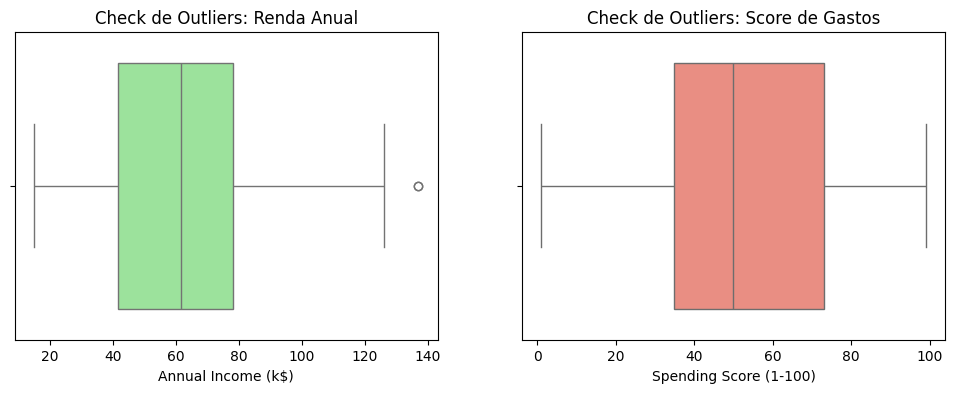

In [12]:
# --- ETAPA B: ANÁLISE DE CONSISTÊNCIA ---
# Insight: O K-Means sofre com outliers. Vamos checar Renda e Idade.
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Annual Income (k$)'], color='lightgreen')
plt.title('Check de Outliers: Renda Anual')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Spending Score (1-100)'], color='salmon')
plt.title('Check de Outliers: Score de Gastos')
plt.show()

Justificativa do Tratamento:

CustomerID: Removido para evitar que o algoritmo tente agrupar clientes por sua ordem de cadastro.

Outliers: Se houver um cliente com renda de $500k (muito acima da média), ele "puxaria" um cluster inteiro só para ele. O boxplot nos ajuda a decidir se removemos esses pontos extremos.

**2. Pré-processamento e Padronização**

O K-Means calcula a distância entre os pontos. Se a Idade varia de 18 a 70 e a Renda de 15 a 130, a Renda terá um "peso" maior na distância. Precisamos que todos falem a mesma língua.

In [13]:
# Seleção de variáveis numéricas
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df_model[features]

# Padronização (Z-score)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Insight: Agora a média de cada coluna é 0 e o desvio padrão é 1.
# O gráfico não mudará de forma, mas os eixos agora são comparáveis.

**3. Implementação: Encontrando o "K" Ideal**

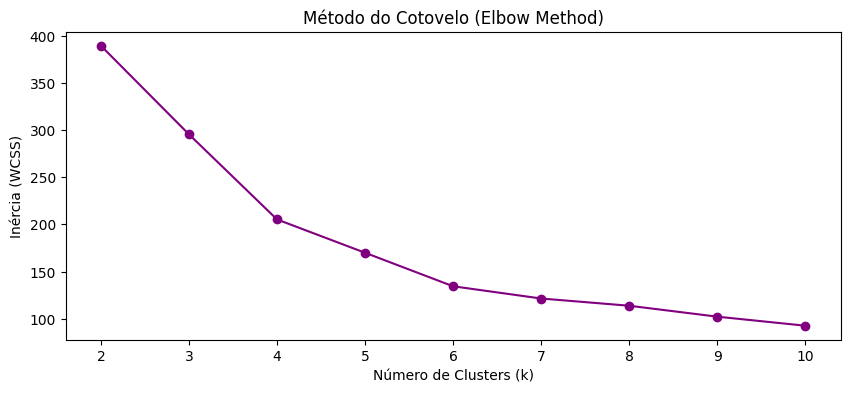

In [14]:
wcss = []
scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Gráfico do Cotovelo
plt.figure(figsize=(10, 4))
plt.plot(range(2, 11), wcss, marker='o', color='purple')
plt.title('Método do Cotovelo (Elbow Method)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia (WCSS)')
plt.show()

Insight do "K": O ponto onde a curva para de cair drasticamente (o "cotovelo") indica o número ideal de segmentos. Para este dataset, o valor costuma ser 5.

**4. Avaliação e Insights Estratégicos**

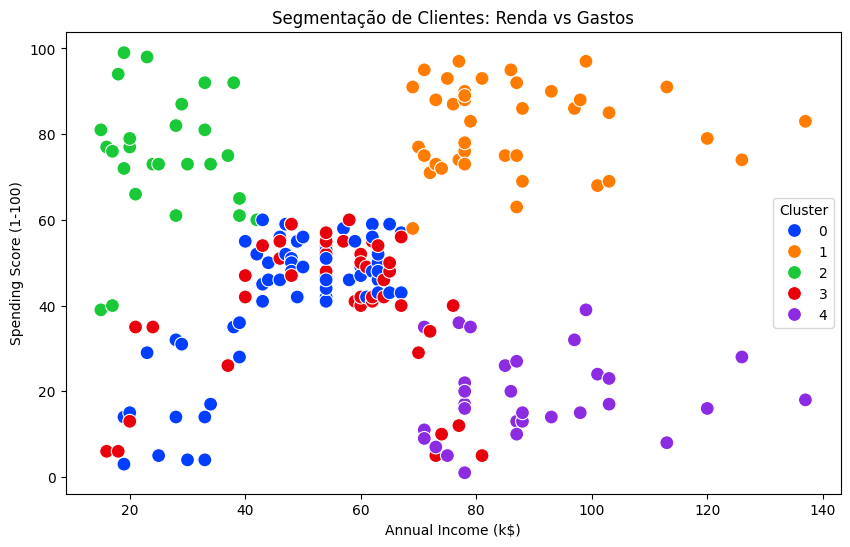

In [15]:
# Modelo Final
kmeans_final = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans_final.fit_predict(X_scaled)

# Gráfico de Visualização
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', palette='bright', s=100)
plt.title('Segmentação de Clientes: Renda vs Gastos')
plt.show()

Interpretação e Aplicação Prática:
Ao analisar as médias de cada grupo, você encontrará perfis como estes:

Cluster "Estrela": Renda Alta e Gasto Alto.

Ação: Marketing de luxo, programas de fidelidade VIP.

Cluster "Criterioso": Renda Alta e Gasto Baixo.

Ação: Enviar ofertas baseadas em qualidade e exclusividade para "destravar" o consumo.

Cluster "Alvo Jovem": Renda Baixa e Gasto Alto.

Ação: Promoções parceladas e tendências (clientes que gastam o que têm e o que não têm).

Cluster "Econômico": Renda Baixa e Gasto Baixo.

Ação: Campanhas de cupons de desconto e itens essenciais.

Cluster "Médio": Estão no centro de tudo.

Ação: Manter o engajamento padrão via e-mail marketing.